<a href="https://colab.research.google.com/github/mirsazzathossain/CSE317-Lab/blob/autumn_2022/Lab_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name:** Ayatullah Arefin

**ID:** 2022353

#### **Polynomial Regression**

In this assignment, you will implement polynomial regression and apply it to the [Assignment 4 Dataset](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/mirsazzathossain/CSE317-Lab-Numerical-Methods/blob/main/datasets/data.csv).

The dataset contains two columns, the first column is the feature and the second column is the label. The goal is find the best fit line for the data.

You will need to perform the following regression tasks and find the best one for the dataset.

1.    **Linear Regression:**

     The equation we are trying to fit is:
     $$y = \theta_0 + \theta_1 x$$
     where $x$ is the feature and $y$ is the label.

     We can rewrite the equation in vector form as:
$$Y = X\theta$$ where $X$ is a matrix with two columns, the first column is all 1s and the second column is the feature, and $Y$ is a vector with the labels. $\theta$ is a vector with two elements, $\theta_0$ and $\theta_1$. The $X$ matrix will look like this:
$$X = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix}$$
2. **Quadratic Regression:**

     The equation we are trying to fit is:
     $$y = \theta_0 + \theta_1 x + \theta_2 x^2$$
     where $x$ is the feature and $y$ is the label.

     We can rewrite the equation in vector form as:
$$Y = X\theta$$where $X$ is a matrix with three columns, the first column is all 1s, the second column is the feature, and the third column is the feature squared, and $Y$ is a vector with the labels. $\theta$ is a vector with three elements, $\theta_0$, $\theta_1$, and $\theta_2$. The $X$ matrix will look like this:

$$X = \begin{bmatrix} 1 & x_1 & x_1^2 \\ 1 & x_2 & x_2^2 \\ \vdots & \vdots & \vdots \\ 1 & x_n & x_n^2 \end{bmatrix}$$
3. **Cubic Regression:**

     The equation we are trying to fit is:
$$y = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3$$
     where $x$ is the feature and $y$ is the label.

     We can rewrite the equation in vector form as:
$$Y = X\theta$$where $X$ is a matrix with four columns, the first column is all 1s, the second column is the feature, the third column is the feature squared, and the fourth column is the feature cubed, and $Y$ is a vector with the labels. $\theta$ is a vector with four elements, $\theta_0$, $\theta_1$, $\theta_2$, and $\theta_3$. The $X$ matrix will look like this:
$$X = \begin{bmatrix} 1 & x_1 & x_1^2 & x_1^3 \\ 1 & x_2 & x_2^2 & x_2^3 \\ \vdots & \vdots & \vdots & \vdots \\ 1 & x_n & x_n^2 & x_n^3 \end{bmatrix}$$

Take 15 data points from the dataset and use them as the training set. Use the remaining data points as the test set. For each regression task, find the best $\theta$ vector using the training set. Then, calculate the mean squared error (MSE) on the test set. Plot the training set, the test set (in a different color), and the best fit line for each regression task. Which regression task gives the best fit line? Which regression task gives the lowest MSE on the test set? Report your answers in a Markdown cell.

**Note:** Do not use any built-in functions like `np.polyfit` or `sklearn.linear_model.LinearRegression` or any other built-in functions that perform polynomial regression. You must implement the regression tasks yourself.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('data.csv',header = None)
print(dataset)

           0           1
0  -3.292157  -53.468412
1   0.799528   -1.262560
2  -0.936214   -3.506193
3  -4.722680 -107.223200
4  -3.602674  -49.131950
5   4.931834    8.901224
6  -0.850265   -5.466242
7   2.454072   -5.762632
8   2.309657   -0.600586
9   0.768204    1.222678
10  1.567869   -3.956637
11 -2.362821  -21.989895
12 -0.283113   -6.118123
13  1.634975  -10.468440
14  0.668410   -4.119557
15  0.998977   -3.029419
16 -2.482237  -21.761523
17  2.615475   -1.512952
18  1.060797   -4.754912
19  4.562287    6.507233


In [19]:
dataset.columns = ['feature', 'label']
x = dataset.feature.to_numpy()
y = dataset.label.to_numpy()

x_train = x[:15]
print('first 15 training set from feature:\n',x_train)
#print(x_train**0)
#print(x_train**1)
A = np.column_stack((x_train**i for i in range(2))) #Vandermoth Matrix 
print('first column is all 1s and the second column is the feature:\n',A)

first 15 training set from feature:
 [-3.292157  0.799528 -0.936214 -4.72268  -3.602674  4.931834 -0.850265
  2.454072  2.309657  0.768204  1.567869 -2.362821 -0.283113  1.634975
  0.66841 ]
first column is all 1s and the second column is the feature:
 [[ 1.       -3.292157]
 [ 1.        0.799528]
 [ 1.       -0.936214]
 [ 1.       -4.72268 ]
 [ 1.       -3.602674]
 [ 1.        4.931834]
 [ 1.       -0.850265]
 [ 1.        2.454072]
 [ 1.        2.309657]
 [ 1.        0.768204]
 [ 1.        1.567869]
 [ 1.       -2.362821]
 [ 1.       -0.283113]
 [ 1.        1.634975]
 [ 1.        0.66841 ]]


<ipython-input-19-d5cdffe0b085>:9: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  A = np.column_stack((x_train**i for i in range(2))) #Vandermoth Matrix


In [21]:
x_test = x[15:]
print('remaining testing set from feature:\n',x_test)
y_train = y[:15]
# print('first 15 training set from label:\n',y_train)
y_test = y[15:]
# print('remaining testing set from label:\n',y_test)

remaining testing set from feature:
 [ 0.998977 -2.482237  2.615475  1.060797  4.562287]


In [5]:
R_INV = np.linalg.inv(np.dot(A.T,A))      #R_Inverse
Q_T = A.T           # Q_Transpose
psu_INV = np.dot(R_INV,Q_T)         #pseudo Invers = R^(-1) * Q^T
beta = np.dot(psu_INV, y_train)     #Theta

print(beta)

[-16.9522281    9.46836384]


In [22]:
y_new = np.zeros(5)
for i in range(2):
  y_new += beta[i] * x_test**i

#y_new = beta[0] + beta[1] * x_test
#y = Theta(0) + Theta(1) * x
print(y_new)
print(y_test)
mse_linear = np.square(abs(y_new-y_test)).mean()
print('MSE of Linear:\n',mse_linear)

[-1.2968117  -4.98353172  0.41511281 -1.23134228  2.47685069]
[ -3.029419 -21.761523  -1.512952  -4.754912   6.507233]
MSE of Linear:
 63.37597569629844


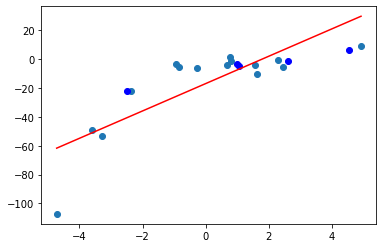

In [7]:
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test,color='b')
x_line = np.linspace(x.min(),x.max(),150)
y_line_1 = np.zeros(150)
for i in range(2):
  y_line_1 += beta[i] * x_line**i
plt.plot(x_line,y_line_1,color='r')
plt.show()

In [23]:
#2. Quadratic Regression

A = np.column_stack((x_train**i for i in range(3)))
print('the first column is all 1s, the second column is the feature, and the third column is the feature squared:\n',A)

the first column is all 1s, the second column is the feature, and the third column is the feature squared:
 [[ 1.         -3.292157   10.83829771]
 [ 1.          0.799528    0.63924502]
 [ 1.         -0.936214    0.87649665]
 [ 1.         -4.72268    22.30370638]
 [ 1.         -3.602674   12.97925995]
 [ 1.          4.931834   24.3229866 ]
 [ 1.         -0.850265    0.72295057]
 [ 1.          2.454072    6.02246938]
 [ 1.          2.309657    5.33451546]
 [ 1.          0.768204    0.59013739]
 [ 1.          1.567869    2.4582132 ]
 [ 1.         -2.362821    5.58292308]
 [ 1.         -0.283113    0.08015297]
 [ 1.          1.634975    2.67314325]
 [ 1.          0.66841     0.44677193]]


<ipython-input-23-2c28263f39aa>:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  A = np.column_stack((x_train**i for i in range(3)))


In [9]:
R_INV = np.linalg.inv(np.dot(A.T,A))
Q_T = A.T
psu_INV = np.dot(R_INV,Q_T)
beta = np.dot(psu_INV, y_train)
print(beta)
#theta[0], theta[1], theta[2]

[-5.50819178  8.71734491 -1.79770237]


In [10]:
y_new = np.zeros(5)
for i in range(3):
  y_new += beta[i] * x_test**i
print(y_new)
#y_new = beta[0] * x_test**0 
#y_new = beta[1] * x_test**1
#y_new = beta[2] * x_test**2

# y = beta[0] + beta[1] * x + beta[2] * x^2
print(y_test)
mse_quadratic = np.square(abs(y_new-y_test)).mean()
print(mse_quadratic)

[  1.40620914 -38.22325198   4.99424626   1.71620456  -3.15537133]
[ -3.029419 -21.761523  -1.512952  -4.754912   6.507233]
93.64964381498447


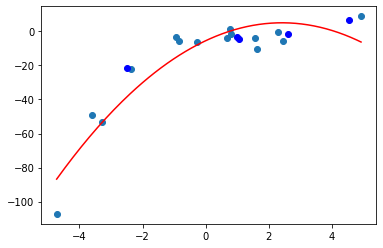

In [11]:
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test,color='b')
x_line = np.linspace(x.min(),x.max(),150)
y_line_2 = np.zeros(150)
for i in range(3):
  y_line_2 += beta[i] * x_line**i
plt.plot(x_line,y_line_2,color='r')
plt.show()

In [24]:
# 3 Cubic Regression
A = np.column_stack((x_train**i for i in range(4)))
print('the first column is all 1s, the second column is the feature, the third column is the feature squared, and the fourth column is the feature cubed:\n',A)
# y = beta[0] + beta[1] * x + beta[2] * x^2 + beta[3] * x^3

the first column is all 1s, the second column is the feature, the third column is the feature squared, and the fourth column is the feature cubed:
 [[ 1.00000000e+00 -3.29215700e+00  1.08382977e+01 -3.56813777e+01]
 [ 1.00000000e+00  7.99528000e-01  6.39245023e-01  5.11094295e-01]
 [ 1.00000000e+00 -9.36214000e-01  8.76496654e-01 -8.20588438e-01]
 [ 1.00000000e+00 -4.72268000e+00  2.23037064e+01 -1.05333268e+02]
 [ 1.00000000e+00 -3.60267400e+00  1.29792600e+01 -4.67600424e+01]
 [ 1.00000000e+00  4.93183400e+00  2.43229866e+01  1.19956932e+02]
 [ 1.00000000e+00 -8.50265000e-01  7.22950570e-01 -6.14699567e-01]
 [ 1.00000000e+00  2.45407200e+00  6.02246938e+00  1.47795735e+01]
 [ 1.00000000e+00  2.30965700e+00  5.33451546e+00  1.23209010e+01]
 [ 1.00000000e+00  7.68204000e-01  5.90137386e-01  4.53345900e-01]
 [ 1.00000000e+00  1.56786900e+00  2.45821320e+00  3.85415627e+00]
 [ 1.00000000e+00 -2.36282100e+00  5.58292308e+00 -1.31914479e+01]
 [ 1.00000000e+00 -2.83113000e-01  8.01529708e-0

<ipython-input-24-8924425d7e72>:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  A = np.column_stack((x_train**i for i in range(4)))


In [13]:
R_INV = np.linalg.inv(np.dot(A.T,A))
Q_T = A.T
psu_INV = np.dot(R_INV,Q_T)
beta = np.dot(psu_INV, y_train)
print(beta)

[-2.35476117  1.05903286 -2.13182381  0.48560469]


In [14]:
y_new = np.zeros(5)
for i in range(4):
  y_new += beta[i] * x_test**i
print(y_new)

#y_new = beta[0] * x_test**0 
#y_new = beta[1] * x_test**1
#y_new = beta[2] * x_test**2
#y_new = beta[3] * x_test**3
print(y_test)
mse_cubic = np.square(abs(y_new-y_test)).mean()
print(mse_cubic)

[ -2.94016013 -25.54575134  -5.47977877  -3.05059435   4.21785925]
[ -3.029419 -21.761523  -1.512952  -4.754912   6.507233]
7.6419993456270685


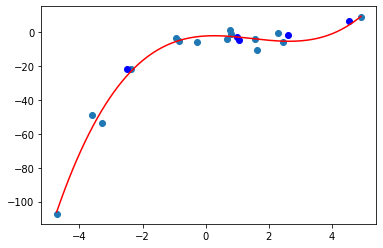

In [15]:
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test,color='b')
x_line = np.linspace(x.min(),x.max(),150)
y_line_3 = np.zeros(150)
for i in range(4):
  y_line_3 += beta[i] * x_line**i
plt.plot(x_line,y_line_3,color='r')
plt.show()

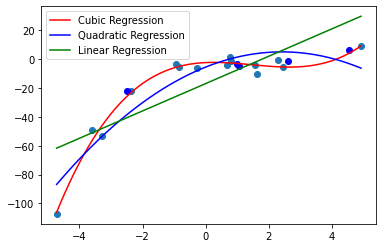

170.1101799797149
93.64964381498447
7.6419993456270685


In [16]:
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test,color='b')
plt.plot(x_line,y_line_3,color='r')
plt.plot(x_line,y_line_2,color='b')
plt.plot(x_line,y_line_1,color='g')
plt.legend(['Cubic Regression','Quadratic Regression','Linear Regression'])
plt.show()
print(mse_linear)
print(mse_quadratic)
print(mse_cubic)

**1**.Which regression task gives the best fit line?



In [25]:
# ANSWER: From the graph we can see that the cubic Regression gives the best fit line

**2**.Which regression task gives the lowest MSE on the test set?

In [26]:
# Answer: And also the lowest MSE is for the Cubic Regression on the test set.